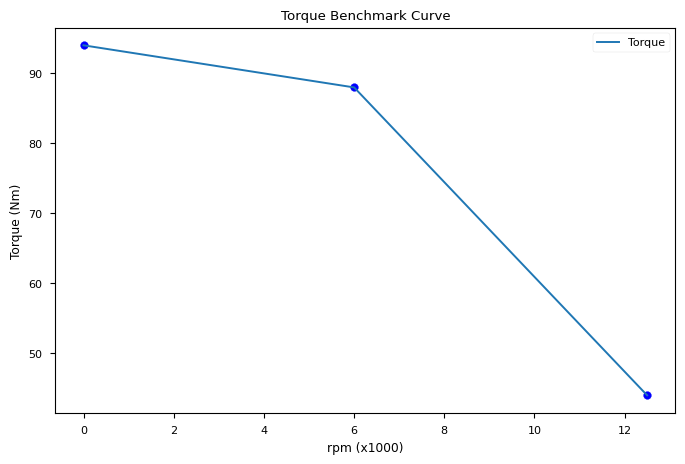

Equation of line 1: -1.0x + 94.0
Equation of line 2: -6.769230769230769x + 128.6153846153846


'torque_ref.csv'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cmath
plt.style.use('seaborn-v0_8-paper')

def ref_torque():
    #quantity of points per segment
    N = 10000

    #defining points
    x1, y1 = 0, 94
    x2, y2 = 6, 88
    x3, y3 = 12.5, 44

    #finding first line equation coefficients
    a1 = (y2 - y1) / (x2 - x1)
    b1 = y1 - a1 * x1

    #finding second line equation coefficients
    a2 = (y3 - y2) / (x3 - x2)
    b2 = y2 - a2 * x2

    #creating points along each line
    x_vals_1 = np.linspace(x1, x2, N)
    y_vals_1 = a1 * x_vals_1 + b1
    x_vals_2 = np.linspace(x2, x3, N)
    y_vals_2 = a2 * x_vals_2 + b2

    #combining the segments
    velocity = np.concatenate((x_vals_1, x_vals_2))
    torque = np.concatenate((y_vals_1, y_vals_2))

    #saving function in a csv file
    df = pd.DataFrame({'rpm': velocity, 'T_ref': torque})
    path = 'torque_ref.csv'
    df.to_csv(path, index=False)

    #plotting the curve
    plt.figure(figsize=(8, 5))
    plt.plot(velocity, torque, label='Torque')
    plt.scatter([x1, x2, x3], [y1, y2, y3], color='blue') #marking the original points
    plt.title('Torque Benchmark Curve')
    plt.xlabel('rpm (x1000)')
    plt.ylabel('Torque (Nm)')
    plt.legend()
    plt.savefig('torque_ref.pdf', dpi = 200)
    plt.show()

    print(f"Equation of line 1: {a1}x + {b1}")
    print(f"Equation of line 2: {a2}x + {b2}")

    return path

#calling the function
ref_torque()

In [2]:
def ref_power():
    #quantity of points per segment
    N = 5000

    #defining points
    x1, y1 = 0, 0
    x2, y2 = 6, 56
    x3, y3 = 8, 62
    x4, y4 = 11, 61
    x5, y5 = 12.5, 59

    #finding first line equation coefficients
    a1 = (y2 - y1) / (x2 - x1)
    b1 = y1 - a1 * x1

    #finding second line equation coefficients
    a2 = (y3 - y2) / (x3 - x2)
    b2 = y2 - a2 * x2

    #finding third line equation coefficients
    a3 = (y4 - y3) / (x4 - x3)
    b3 = y3 - a3 * x3

    #finding fourth line equation coefficients
    a4 = (y5 - y4) / (x5 - x4)
    b4 = y4 - a4 * x4

    #creating points along each line
    x_vals_1 = np.linspace(x1, x2, N)
    y_vals_1 = a1 * x_vals_1 + b1
    x_vals_2 = np.linspace(x2, x3, N)
    y_vals_2 = a2 * x_vals_2 + b2
    x_vals_3 = np.linspace(x3, x4, N)
    y_vals_3 = a3 * x_vals_3 + b3
    x_vals_4 = np.linspace(x4, x5, N)
    y_vals_4 = a4 * x_vals_4 + b4

    #combining the segments
    velocity = np.concatenate((x_vals_1, x_vals_2, x_vals_3, x_vals_4))
    power = np.concatenate((y_vals_1, y_vals_2, y_vals_3, y_vals_4))

    #saving function in a csv file
    df = pd.DataFrame({'rpm': velocity, 'P':power})
    path = 'power_ref.csv'
    df.to_csv(path, index=False)

    #plotting the curve
    #plt.figure(figsize=(8, 5))
    #plt.plot(velocity, power, label='Power')
    #plt.scatter([x1, x2, x3, x4, x5], [y1, y2, y3, y4, y5], color='blue') #marking the original points
    #plt.title('Performance Benchmark Curve')
    #plt.xlabel('rpm (x1000)')
    #plt.ylabel('Performance (kW)')
    #plt.legend()
    #plt.savefig('power_ref.pdf', dpi = 200)
    #plt.show()

    print(f"Equation of line 1: {a1}x + {b1}")
    print(f"Equation of line 2: {a2}x + {b2}")
    print(f"Equation of line 3: {a3}x + {b3}")
    print(f"Equation of line 4: {a4}x + {b4}")

    return path

#calling the function
ref_power()

Equation of line 1: 9.333333333333334x + 0.0
Equation of line 2: 3.0x + 38.0
Equation of line 3: -0.3333333333333333x + 64.66666666666667
Equation of line 4: -1.3333333333333333x + 75.66666666666667


'power_ref.csv'

In [3]:
def power_factor(start, end, N, b):

  #creating an array of power factors on a log space
  pf = np.logspace(b**start, b**end, N, base=b)

  return pf

#calling the function
power_factor(0.95, 1.3, 30, 0.01)

array([0.94367292, 0.94518426, 0.94669803, 0.94821422, 0.94973284,
       0.95125389, 0.95277738, 0.9543033 , 0.95583168, 0.95736249,
       0.95889576, 0.96043149, 0.96196968, 0.96351033, 0.96505344,
       0.96659903, 0.96814709, 0.96969764, 0.97125066, 0.97280617,
       0.97436418, 0.97592468, 0.97748768, 0.97905318, 0.98062119,
       0.98219171, 0.98376474, 0.9853403 , 0.98691838, 0.98849898])

In [4]:
def vabc(p_nom ,i_rms , pf):

  #finding Vrms based on nominal power and Irms
  v_rms = (p_nom * 1000)/(math.sqrt(3) * i_rms * pf)

  #defining the x axis
  t = np.linspace(0, 13.32, 20000)

  #creating the sine waves
  va = (v_rms * np.sqrt(2)) * np.sin(2 * np.pi * 50 * t)
  vb = (v_rms * np.sqrt(2)) * np.sin(2 * np.pi * 50 * t + (2 * np.pi/3))
  vc = (v_rms * np.sqrt(2)) * np.sin(2 * np.pi * 50 * t - (2 * np.pi/3))

  #saving function in a csv file
  df = pd.DataFrame({'time': t, 'Va': va, 'Vb': vb, 'Vc':vc})
  path = 'vabc.csv'
  df.to_csv(path, index=False)

  #plotting the curve
  #plt.figure(figsize=(8, 5))
  #plt.plot(t[0:50], va[0:50], label='Va')
  #plt.plot(t[0:50], vb[0:50], label='Vb')
  #plt.plot(t[0:50], vc[0:50], label='Vc')
  #plt.title('Voltage x Time')
  #plt.xlabel('Time (s)')
  #plt.ylabel('Voltage (V)')
  #plt.legend()
  #plt.savefig('Vabc.pdf', dpi = 200)
  #plt.show()

  return v_rms

#calling the function
vabc(60 ,235 , 0.98)

150.41691772200411

In [5]:
#Creating a current database
def iabc(v_rms, power_db, pf):
  #where v is the nominal voltage and p is the power database

  #reading csv
  p = pd.read_csv(power_db)

  #creating the x coordinate
  t = np.linspace(0, 13.32, 20000)

  #finding I's magnitude and phase
  i_mag = (p['P'] * 1000)/(math.sqrt(3) * v_rms * pf)
  i_phase = math.acos(pf)

  #creating the sine waves
  ia = (i_mag * np.sqrt(2)) * np.sin(2 * np.pi * 50 * t +  i_phase)
  ib = (i_mag * np.sqrt(2)) * np.sin(2 * np.pi * 50 * t +  i_phase + (2 * np.pi/3))
  ic = (i_mag * np.sqrt(2)) * np.sin(2 * np.pi * 50 * t +  i_phase - (2 * np.pi/3))

  #storing the current values on a db
  df_i = pd.DataFrame({
        'time': t,
        'Ia': ia,
        'Ib': ib,
        'Ic': ic
    })

  #saving db on a csv file
  path = 'iabc.csv'
  df_i.to_csv(path, index=False)


  #plotting the curve
  #plt.figure(figsize=(8, 5))
  #plt.plot(t[10000:10100], ia[10000:10100], label='Ia')
  #plt.plot(t[10000:10100], ib[10000:10100], label='Ib')
  #plt.plot(t[10000:10100], ic[10000:10100], label='Ic')
  #plt.title('Current X time')
  #plt.xlabel('time (s)')
  #plt.ylabel('I (A)')
  #plt.legend()
  #plt.savefig('Iabc.pdf', dpi = 200)
  #plt.show()

  return path

# Calling the function
#iabc(148.8975 , 'power_ref.csv', 0.98)

In [6]:
#finding Iq and Id with Park's transform
def park(iabc_db):

  #reading csv
  iabc = pd.read_csv(iabc_db)

  #since the system is balanced delta = 0
  delta = 0

  #creating time vector based on the info that the car acelerates from 0 to 100km/h in 9.0s
  t = np.linspace(0, 13.32, 20000)

  #phase vector, based on the hunch that the frequency is 50Hz
  wt= - 2 * np.pi * 50 * t

  #getting values from each column on the iabc db
  ia = iabc['Ia']
  ib = iabc['Ib']
  ic = iabc['Ic']

  #aplying the park transform
  id = (2/3)*(ia*np.cos(wt+delta) + ib*np.cos(wt+delta-(2*np.pi/3))
  + ic*np.cos(wt+delta+(2*np.pi/3)))

  iq = (2/3)*(ia* (- np.sin(wt+delta)) + ib* (- np.sin(wt+delta-(2*np.pi/3)))
  + ic* ( - np.sin(wt+delta+(2*np.pi/3))))

  iz = (2/3)*(ia+ib+ic)/2

  #storing the transform results on a new db
  df_idq = pd.DataFrame({
        'time': t,
        'Iq': id,
        'Id': iq,
        'Iz': iz
    })

  #saving db on a csv file
  path = 'idq.csv'
  df_idq.to_csv(path, index=False)

  #plotting the curve
  #plt.figure(figsize=(8, 5))
  #plt.plot(t, id, label='Id')
  #plt.plot(t, iq, label='Iq')
  #plt.plot(t, iz, label='I0')
  #plt.title('Idq X time')
  #plt.xlabel('time (s)')
  #plt.ylabel('I (A)')
  #plt.legend()
  #plt.savefig('Idq.pdf', dpi = 200)
  #plt.show()

  return path

park('iabc.csv')

'idq.csv'

In [8]:
#estimated torque equation

def est_torque(Ld, Lq, yf, idq_db):

  idq = pd.read_csv(idq_db)

  #creating x axis
  x = np.linspace(0, 12.5, 20000)

  #creating estimated torque equation
  T = (3/4) * 12 * idq['Iq'] * (Ld * idq['Id'] + yf - Lq * idq['Id'])

  #saving db on a csv file
  path = 'torque_est.csv'
  df = pd.DataFrame({
        'rpm': x,
        'T_est': T,
    })
  df.to_csv(path, index=False)

  #plotting the curve
  #plt.figure(figsize=(8, 5))
  #plt.plot(x, T, label='est. torque')
  #plt.title('Estimated Torque X Velocity')
  #plt.xlabel('rpm (x1000)')
  #plt.ylabel('Torque (N.m)')
  #plt.legend()
  #plt.savefig('/content/drive/MyDrive/Colab Notebooks/torque_est.pdf', dpi = 200)
  #plt.show()

  return path

est_torque(0.00540105, 0.00553938, 0.17319, 'idq.csv')

'torque_est.csv'

In [9]:
#root mean square error equation
def RMSE(ref_db, est_db):

  #reading csv files
  T_ref = pd.read_csv(ref_db)
  T_est = pd.read_csv(est_db)

  ref = T_ref['T_ref']
  est = T_est['T_est']

  i = (ref - est)**2

  n = len(T_ref)

  rmse = np.sqrt((1/n) * np.sum(i))

  x = T_ref['rpm']
  error = np.sqrt((ref - est)**2)

  #plotting the curve
  #plt.figure(figsize=(8, 5))
  #plt.plot(x, error, label='error')
  #plt.title('error x rpm')
  #plt.xlabel('rpm (x1000)')
  #plt.ylabel('error (N.m)')
  #plt.legend()
  #plt.show()

  return rmse

RMSE('torque_ref.csv', 'torque_est.csv')

52.77008627347007

In [11]:
#starting optimazation
from scipy.optimize import dual_annealing
from numpy.random import rand

#defining parameters inicial values
Ld_init = 0.0066
Lq_init = 0.0058
yf_init = 0.11546

#setting paths
idq_path = 'idq.csv'
T_ref_path = 'torque_ref.csv'

def objective(params):
  Ld, Lq, yf = params
  T_est_path = est_torque(Ld, Lq, yf, idq_path)
  return RMSE(T_ref_path, T_est_path)

# define range for input
r_min, r_max = 0.25, 1.75
# define the bounds on the search
bounds = [[r_min*Ld_init, r_max*Ld_init], [r_min*Lq_init, r_max*Lq_init], [r_min*yf_init, r_max*yf_init]]
# perform the dual annealing search
result = dual_annealing(objective, bounds, maxiter=10, seed=43, initial_temp=50000, no_local_search=True)

# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : ['Maximum number of iteration reached']
Total Evaluations: 61
Solution: f([0.00394561 0.00408285 0.0997824 ]) = 37.12008


In [12]:
#starting optimazation
from scipy.optimize import dual_annealing
from numpy.random import rand

#defining parameters inicial values
Ld_init = 0.00824902
Lq_init = 0.0084312
yf_init = 0.18928171

#setting paths
idq_path = 'idq.csv'
T_ref_path = 'torque_ref.csv'

def objective(params):
  Ld, Lq, yf = params
  T_est_path = est_torque(Ld, Lq, yf, idq_path)
  return RMSE(T_ref_path, T_est_path)

# define range for input
r_min, r_max = 0.25, 1.75
# define the bounds on the search
bounds = [[r_min*Ld_init, r_max*Ld_init], [r_min*Lq_init, r_max*Lq_init], [r_min*yf_init, r_max*yf_init]]
# perform the dual annealing search
result = dual_annealing(objective, bounds, maxiter=10, seed=43, initial_temp=50000, no_local_search=True)

# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : ['Maximum number of iteration reached']
Total Evaluations: 61
Solution: f([0.00514345 0.00537197 0.15337929]) = 28.38123


In [56]:
#starting optimazation
from scipy.optimize import dual_annealing
from numpy.random import rand

fp = power_factor(0.95, 1.3, 30, 0.01)
p_nom = 60
i_rms = 235
resultados = pd.DataFrame({'Ld':[0.00169012],'Lq':[0.00186888],'Lambda_f':[0.11546],'resultado':[140]})
for elem in fp:
    
    v_rms = (p_nom * 1000)/(math.sqrt(3) * i_rms * elem)
    
    iabc(v_rms , 'power_ref.csv', elem)
    
    park('iabc.csv')
    
    #defining parameters inicial values
    Ld_init = 30e-3
    Lq_init = 30e-3
    yf_init = 70e-3

    #setting paths
    idq_path = 'idq.csv'
    T_ref_path = 'torque_ref.csv'

    def objective(params):
      Ld, Lq, yf = params
      T_est_path = est_torque(Ld, Lq, yf, idq_path)
      return RMSE(T_ref_path, T_est_path)

    # define range for input
    r_min, r_max = 0.2, 1.8
    # define the bounds on the search
    bounds = [[r_min*Ld_init, r_max*Ld_init], [r_min*Lq_init, r_max*Lq_init], [r_min*yf_init, r_max*yf_init]]
    # perform the dual annealing search
    result = dual_annealing(objective, bounds, maxiter=100, seed=41, initial_temp=10000, no_local_search=True, accept = -10)
    
    # evaluate solution
    solution = result['x']
    evaluation = objective(solution)
    print('Solution: f(%s) = %.5f' % (solution, evaluation))
    new_row = pd.DataFrame({'Ld':[solution[0]],'Lq':[solution[1]],'Lambda_f':[solution[2]],'resultado':[evaluation]})
    resultados = pd.concat([resultados,new_row],ignore_index=True)

Solution: f([0.03750967 0.03754517 0.09105933]) = 32.34390
Solution: f([0.04499593 0.04486618 0.0418082 ]) = 36.10153
Solution: f([0.05135914 0.05151115 0.11094542]) = 34.19209
Solution: f([0.03750967 0.03754517 0.09475688]) = 32.36757
Solution: f([0.04499593 0.04486618 0.04550575]) = 35.98881
Solution: f([0.03750967 0.03754517 0.09788834]) = 32.38505
Solution: f([0.03750967 0.03754517 0.10146971]) = 32.45242
Solution: f([0.03750967 0.03754517 0.10216395]) = 32.43117
Solution: f([0.01453888 0.01456598 0.10307154]) = 32.70960
Solution: f([0.03750967 0.03754517 0.10566239]) = 32.46396
Solution: f([0.03750967 0.03754517 0.10682898]) = 32.45751
Solution: f([0.04499593 0.04486618 0.05719555]) = 35.71527
Solution: f([0.03750967 0.03754517 0.11129995]) = 32.50365
Solution: f([0.03750967 0.03754517 0.11360866]) = 32.52511
Solution: f([0.0517109  0.05157776 0.05915466]) = 35.62901
Solution: f([0.02227743 0.02230114 0.11386001]) = 32.73731
Solution: f([0.0517109  0.05157776 0.06585868]) = 35.516